<a href="https://colab.research.google.com/github/immischein/ML-bandgap/blob/main/model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Packages

In [2]:
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.0 MB/s eta 0:00:00


# Imports

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from scipy.stats import pearsonr

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OneHotEncoder
import shap

import category_encoders as ce



# Data Imports and Processing


In [4]:
from google.colab import drive
drive.mount('/content/drive')

# import sys
# sys.path.append('/content/drive/MyDrive/ColabImports')

df = pd.read_csv('/content/drive/MyDrive/Project Documents ML-CMT/bandgap_dataset_premium.csv')

Mounted at /content/drive


In [5]:
df.head()

,material_id,band_gap,formula,density,volume,a,b,c,alpha,beta,...,std_am,avg_vdw,vdw_range,max_vdw,min_vdw,std_vdw,vbm,cbm,bulk_modulus,shear_modulus
0,mp-11107,3.5226,Ac2O3,9.109130,91.511224,4.095487,4.095489,6.299882,90.000000,90.000000,...,103.368761,1.900,0.95,2.47,1.52,0.465403,4.5896,8.1122,"{'voigt': 106.531, 'reuss': 96.061, 'vrh': 101...","{'voigt': 42.704, 'reuss': 28.813, 'vrh': 35.758}"
1,mp-32800,2.2962,Ac2S3,6.535149,1118.407852,14.997851,14.997851,14.997851,144.742139,144.742139,...,95.498257,2.068,0.67,2.47,1.80,0.328232,4.8014,7.0976,NaN,NaN
2,mp-977351,3.0275,Ac2S3,5.562971,328.464893,7.619779,7.619773,7.875664,118.930903,61.069136,...,95.498257,2.068,0.67,2.47,1.80,0.328232,2.9069,5.9344,NaN,NaN
3,mp-867311,0.0794,AcAgTe2,7.997421,122.518406,5.574922,5.574922,5.574922,60.000000,60.000000,...,46.591170,2.175,0.41,2.47,2.06,0.171537,5.9961,6.0755,NaN,NaN
4,mp-1183115,4.1024,AcAlO3,8.728230,57.451413,3.858634,3.858634,3.858634,90.000000,90.000000,...,83.410543,1.774,0.95,2.47,1.52,0.369410,6.8036,10.9060,NaN,NaN


In [6]:
# To test script: load dummy data

#from sklearn.datasets import fetch_openml

# Load a regression dataset from OpenML
#data = fetch_openml(name="house_prices", as_frame=True)  # Ames housing data
#df = data.frame

# Rename target to match our script
#df = df.rename(columns={"SalePrice": "band_gap"})

In [7]:
df.head()

,material_id,band_gap,formula,density,volume,a,b,c,alpha,beta,...,std_am,avg_vdw,vdw_range,max_vdw,min_vdw,std_vdw,vbm,cbm,bulk_modulus,shear_modulus
0,mp-11107,3.5226,Ac2O3,9.109130,91.511224,4.095487,4.095489,6.299882,90.000000,90.000000,...,103.368761,1.900,0.95,2.47,1.52,0.465403,4.5896,8.1122,"{'voigt': 106.531, 'reuss': 96.061, 'vrh': 101...","{'voigt': 42.704, 'reuss': 28.813, 'vrh': 35.758}"
1,mp-32800,2.2962,Ac2S3,6.535149,1118.407852,14.997851,14.997851,14.997851,144.742139,144.742139,...,95.498257,2.068,0.67,2.47,1.80,0.328232,4.8014,7.0976,NaN,NaN
2,mp-977351,3.0275,Ac2S3,5.562971,328.464893,7.619779,7.619773,7.875664,118.930903,61.069136,...,95.498257,2.068,0.67,2.47,1.80,0.328232,2.9069,5.9344,NaN,NaN
3,mp-867311,0.0794,AcAgTe2,7.997421,122.518406,5.574922,5.574922,5.574922,60.000000,60.000000,...,46.591170,2.175,0.41,2.47,2.06,0.171537,5.9961,6.0755,NaN,NaN
4,mp-1183115,4.1024,AcAlO3,8.728230,57.451413,3.858634,3.858634,3.858634,90.000000,90.000000,...,83.410543,1.774,0.95,2.47,1.52,0.369410,6.8036,10.9060,NaN,NaN


In [8]:
# Data inspection

print("Data shape:", df.shape)

missing = df.isnull().sum()
missing = missing[missing > 0]
print("Missing values per column:")
for col, n in missing.items():
    print(f"{col}: {n}")

display(df.describe())

Data shape: (82998, 40)
Missing values per column:
formula: 1
avg_en: 9
max_en: 9
min_en: 9
std_en: 9
vbm: 876
cbm: 876
bulk_modulus: 79092
shear_modulus: 79092


,band_gap,density,volume,a,b,c,alpha,beta,gamma,n_atoms,...,max_am,min_am,std_am,avg_vdw,vdw_range,max_vdw,min_vdw,std_vdw,vbm,cbm
count,82998.000000,82998.000000,82998.000000,82998.000000,82998.000000,82998.000000,82998.000000,82998.000000,82998.000000,82998.000000,...,82998.000000,82998.000000,82998.000000,82998.000000,82998.000000,82998.000000,82998.000000,82998.000000,82122.000000,82122.000000
mean,1.984421,4.061805,668.913474,7.669236,8.044636,11.280915,86.028830,88.065828,89.700249,42.406058,...,110.699981,17.901714,31.772083,1.769480,0.787753,2.316020,1.528267,0.290510,1.585835,3.591381
std,1.560981,1.717274,693.624420,3.177138,2.800604,6.822619,17.420383,15.977789,22.074143,40.632079,...,57.428377,18.988597,20.400828,0.193034,0.380579,0.355453,0.203977,0.132925,2.238984,2.214685
min,0.000000,0.020144,11.286588,2.363000,2.363000,2.395898,3.664087,5.397478,5.397478,1.000000,...,1.007940,1.007940,0.000000,1.100000,0.000000,1.100000,1.100000,0.000000,-14.222600,-7.360600
25%,0.653400,2.913572,254.760639,5.553544,6.015389,7.389807,77.756958,88.952439,86.976837,16.000000,...,55.845000,6.941000,15.265807,1.666000,0.540000,2.070000,1.520000,0.207338,0.166850,2.368150
50%,1.728450,3.773981,452.574159,7.012094,7.718989,9.712402,90.000000,90.000000,90.000000,29.000000,...,106.420000,15.999400,26.508649,1.729333,0.720000,2.230000,1.520000,0.267822,1.629350,3.660450
75%,3.013225,4.954535,841.664286,8.965331,9.328646,13.157808,90.000000,90.000000,99.717832,54.000000,...,151.964000,15.999400,45.960918,1.855000,0.970000,2.430000,1.520000,0.348872,2.952475,4.974900
max,17.891400,18.889325,20090.906408,46.210701,61.125585,211.425839,169.783994,169.783994,168.048246,444.000000,...,244.000000,227.000000,107.897541,3.430000,2.330000,3.430000,3.430000,1.165000,12.376100,14.341400


In [9]:
# Drop columns that are prohibited

df = df.drop(columns='vbm')
df = df.drop(columns='cbm')
df = df.drop(columns='formula')
df = df.drop(columns='material_id')

# Define features and target

In [10]:
target_column = "band_gap"
X = df.drop(columns=[target_column])
y = df[target_column]

# Seperate numeric and categorical columns

numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

In [18]:
high_bg_df = df[df['band_gap'] > 10]

print(f"Found {len(high_bg_df)} materials with band gap > 10 eV. Saved to 'high_bandgap_materials.csv'.")

Found 6 materials with band gap > 10 eV. Saved to 'high_bandgap_materials.csv'.


# Preprocessing

In [11]:
# To decide: drop columns with >65% missing values (can be lower, based on this dummy dataset)

threshold = 0.65
missing_frac = df.isnull().mean()
cols_to_drop = missing_frac[missing_frac > threshold].index

print(f"Dropping columns with >{int(threshold*100)}% missing values:")
print(list(cols_to_drop))

df = df.drop(columns=cols_to_drop)

# To decide: impute missing numerical values with mean, categorical features with most frequent value
# StandardScaler subtracts mean and divides by std
# Use onehotencoder for categorical features


# Split into train and test sets BEFORE preprocessing
X = df.drop("band_gap", axis=1)   # Replace "target" with your actual target column name
y = df["band_gap"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply Target Encoding on training set only
te_col = "spacegroup_number "
te_encoder = ce.TargetEncoder(cols=[te_col])
X_train[te_col] = te_encoder.fit_transform(X_train[te_col], y_train)
X_test[te_col] = te_encoder.transform(X_test[te_col])

# Proceed with rest of pre-processing pipeline
numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

numeric_transformer = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler()
)
categorical_transformer = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore")
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

Dropping columns with >65% missing values:
['bulk_modulus', 'shear_modulus']


# Define the models to compare

In [12]:
models = {
    "Dummy": DummyRegressor(),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(random_state=42,  n_estimators=50, max_depth=10, n_jobs=-1)

}

# Model training

In [13]:
# train models
print("\nCross-validated MAE (5-fold):")
for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    scores = cross_val_score(pipeline, X_train, y_train,
                             scoring="neg_mean_absolute_error", cv=5)
    print(f"{name}: MAE = {-np.mean(scores):.3f}")


Cross-validated MAE (5-fold):
Dummy: MAE = 1.284
Linear Regression: MAE = 1.087
Ridge Regression: MAE = 1.087
Random Forest: MAE = 0.857


# Evaluate model


Test set performance:
Dummy: MAE test set = 1.277, R² = -0.000
Dummy: MAE train set = 1.284, R² = 0.000
RMSE: 2.451 eV
Pearson r: nan (p=nan)


<ipython-input-14-43217642af25>:21: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  corr, p = pearsonr(y_test, y_pred)


Linear Regression: MAE test set = 1.087, R² = 0.238
Linear Regression: MAE train set = 1.086, R² = 0.238
RMSE: 1.866 eV
Pearson r: 0.489 (p=0)
Ridge Regression: MAE test set = 1.087, R² = 0.238
Ridge Regression: MAE train set = 1.086, R² = 0.238
RMSE: 1.866 eV
Pearson r: 0.489 (p=0)
Random Forest: MAE test set = 0.847, R² = 0.504
Random Forest: MAE train set = 0.811, R² = 0.547
RMSE: 1.215 eV
Pearson r: 0.712 (p=0)


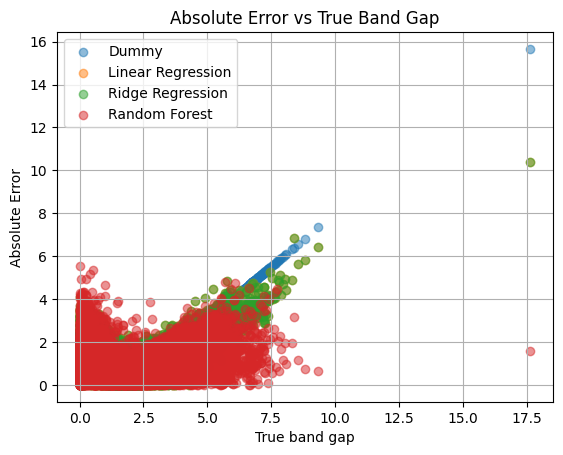

<Figure size 640x480 with 0 Axes>

In [14]:
# Fit on full training set and evaluate on test set

results = {}
print("\nTest set performance:")
for name, model in models.items():
    pipeline = make_pipeline(preprocessor, model)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_train_pred = pipeline.predict(X_train)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"mae": mae, "r2": r2}
    mae_train = mean_absolute_error(y_train_pred, y_train)
    r2_train = r2_score(y_train, y_train_pred)
    results[name] = {"mae": mae, "r2": r2}

    print(f"{name}: MAE test set = {mae:.3f}, R² = {r2:.3f}")
    print(f"{name}: MAE train set = {mae_train:.3f}, R² = {r2_train:.3f}")
    print(f"RMSE: {mean_squared_error(y_test, y_pred):.3f} eV")
    corr, p = pearsonr(y_test, y_pred)
    print(f"Pearson r: {corr:.3f} (p={p:.3g})")

    # Plot MAE vs true value
    #relative_error = np.abs(y_pred - y_test) / y_test
    #plt.scatter(y_test, relative_error, label=name, alpha=0.5)

    plt.scatter(y_test, np.abs(y_pred - y_test), label=name, alpha=0.5)

plt.xlabel("True band gap")
plt.ylabel("Absolute Error")
plt.title("Absolute Error vs True Band Gap")
plt.legend()
plt.grid(True)
plt.show()

plt.savefig("absolute_error_simple_models.png")


In [15]:
# Feature importance of tree based model
rf_model = make_pipeline(preprocessor, RandomForestRegressor(random_state=42))
rf_model.fit(X_train, y_train)

importances = rf_model.named_steps["randomforestregressor"].feature_importances_

# Get feature names from the preprocessor
feature_names = rf_model.named_steps["columntransformer"].get_feature_names_out()

# Sort by importance
sorted_idx = np.argsort(importances)[::-1][:20]
top_features = np.array(feature_names)[sorted_idx]
top_importances = importances[sorted_idx]


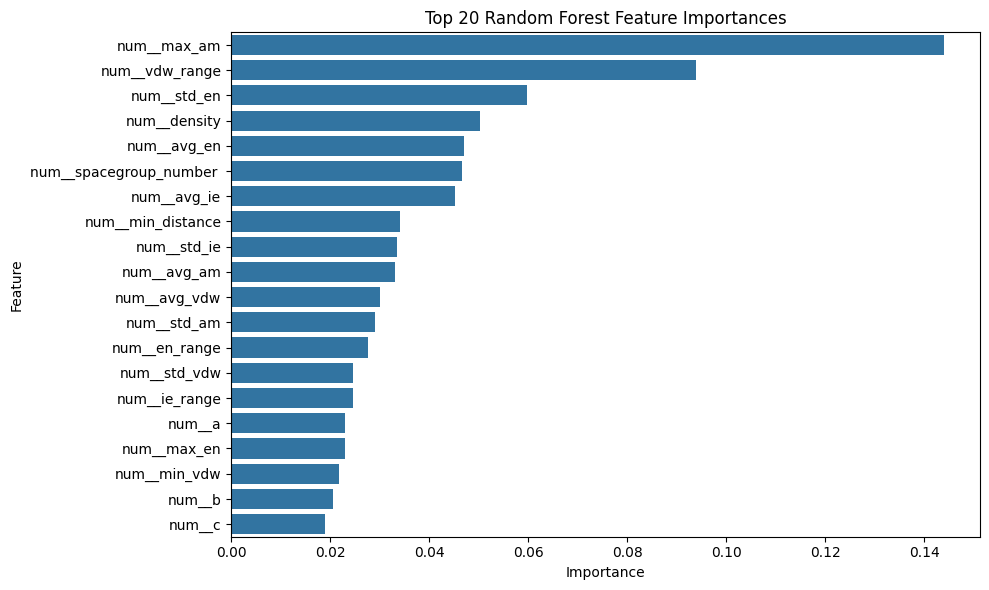

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_importances, y=top_features)
plt.title("Top 20 Random Forest Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
plt.savefig("feature_importance_rf.png")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Feature importance using SHAP
rf = rf_model.named_steps["randomforestregressor"]
X_transformed = rf_model.named_steps["columntransformer"].transform(X_test)

if hasattr(X_transformed, "toarray"):
    X_transformed = X_transformed.toarray()

feature_names = rf_model.named_steps["columntransformer"].get_feature_names_out()

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_transformed)

shap.summary_plot(shap_values, X_transformed, feature_names=feature_names)
plt.savefig("shap_summary_plot.png")


# Deep Learning Code

### Multilayer Perceptron (MLP)

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Model training
mlp = MLPRegressor(hidden_layer_sizes=(100, 50),
                   activation='relu',
                   solver='adam',
                   max_iter=500,
                   random_state=42,
                   early_stopping=True,
                   validation_fraction=0.1,
                   verbose=True)

mlp.fit(X_train_processed, y_train)

Iteration 1, loss = 0.96353939
Validation score: 0.343363
Iteration 2, loss = 0.80324433
Validation score: 0.373292
Iteration 3, loss = 0.76194336
Validation score: 0.408288
Iteration 4, loss = 0.73752463
Validation score: 0.414480
Iteration 5, loss = 0.71736352
Validation score: 0.438584
Iteration 6, loss = 0.69777382
Validation score: 0.439630
Iteration 7, loss = 0.68479947
Validation score: 0.452602
Iteration 8, loss = 0.67571142
Validation score: 0.460795
Iteration 9, loss = 0.66596226
Validation score: 0.461460
Iteration 10, loss = 0.65863859
Validation score: 0.472773
Iteration 11, loss = 0.64955882
Validation score: 0.468558
Iteration 12, loss = 0.64261642
Validation score: 0.472551
Iteration 13, loss = 0.63602115
Validation score: 0.476664
Iteration 14, loss = 0.63139333
Validation score: 0.485408
Iteration 15, loss = 0.62558139
Validation score: 0.487523
Iteration 16, loss = 0.62307194
Validation score: 0.489515
Iteration 17, loss = 0.61655612
Validation score: 0.488817
Iterat

MLPRegressor(early_stopping=True, hidden_layer_sizes=(100, 50), max_iter=500,
             random_state=42, verbose=True)

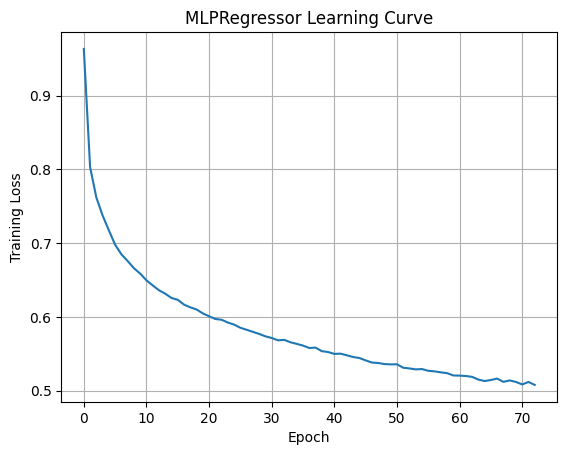

In [ ]:
# Plot learning curve
plt.plot(mlp.loss_curve_)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("MLPRegressor Learning Curve")
plt.grid(True)
plt.show()

In [ ]:
# Evaluate performance
y_pred_sklearn = mlp.predict(X_test_processed)

mae = mean_absolute_error(y_test, y_pred_sklearn)
r2 = r2_score(y_test, y_pred_sklearn)
mse = mean_squared_error(y_test, y_pred_sklearn)
rmse = np.sqrt(mse)

print(f"[MLPRegressor]")
print(f"MAE:  {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²:   {r2:.4f}")


[MLPRegressor]
MAE:  0.8295
RMSE: 1.0948
R²:   0.5108


### Deep Neural Network

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_processed.toarray()
                              if hasattr(X_train_processed, "toarray")
                              else X_train_processed, dtype=torch.float32)

X_test_tensor = torch.tensor(X_test_processed.toarray()
                             if hasattr(X_test_processed, "toarray")
                             else X_test_processed, dtype=torch.float32)

y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [ ]:
# Define model
class DeepRegressor(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.net(x)

model = DeepRegressor(X_train_tensor.shape[1])


In [ ]:
# Train model and register learning curve
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
test_losses = []
n_epochs = 1000

for epoch in range(n_epochs):
    model.train()
    optimizer.zero_grad()
    y_pred_train = model(X_train_tensor)
    loss = criterion(y_pred_train, y_train_tensor)
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        y_pred_test = model(X_test_tensor)
        test_loss = criterion(y_pred_test, y_test_tensor)

    train_losses.append(loss.item())
    test_losses.append(test_loss.item())

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: Train Loss={loss.item():.4f}, Test Loss={test_loss.item():.4f}")

Epoch 0: Train Loss=1.8012, Test Loss=1.8025
Epoch 10: Train Loss=1.7460, Test Loss=1.7477
Epoch 20: Train Loss=1.7010, Test Loss=1.7025
Epoch 30: Train Loss=1.6581, Test Loss=1.6607
Epoch 40: Train Loss=1.6156, Test Loss=1.6209
Epoch 50: Train Loss=1.5713, Test Loss=1.5794
Epoch 60: Train Loss=1.5277, Test Loss=1.5397
Epoch 70: Train Loss=1.4874, Test Loss=1.5037
Epoch 80: Train Loss=1.4527, Test Loss=1.4735
Epoch 90: Train Loss=1.4288, Test Loss=1.4513
Epoch 100: Train Loss=1.4068, Test Loss=1.4338
Epoch 110: Train Loss=1.3871, Test Loss=1.4176
Epoch 120: Train Loss=1.3683, Test Loss=1.4038
Epoch 130: Train Loss=1.3510, Test Loss=1.3930
Epoch 140: Train Loss=1.3369, Test Loss=1.3826
Epoch 150: Train Loss=1.3238, Test Loss=1.3723
Epoch 160: Train Loss=1.3128, Test Loss=1.3643
Epoch 170: Train Loss=1.3016, Test Loss=1.3567
Epoch 180: Train Loss=1.2916, Test Loss=1.3501
Epoch 190: Train Loss=1.2823, Test Loss=1.3432
Epoch 200: Train Loss=1.2732, Test Loss=1.3379
Epoch 210: Train Loss=1.

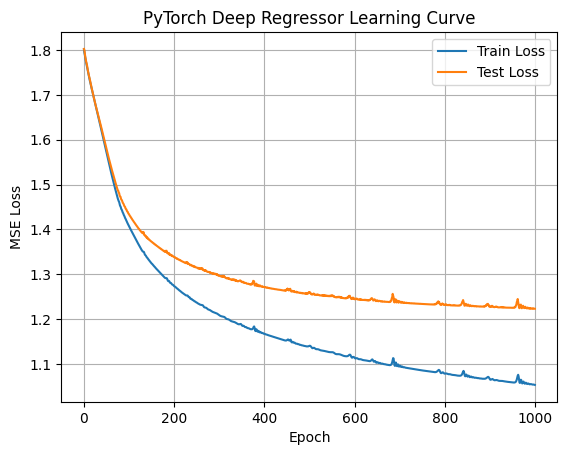

In [ ]:
# Plot learning curves
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("PyTorch Deep Regressor Learning Curve")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Evaluate model
y_pred_torch = y_pred_test.numpy()

mae_torch = mean_absolute_error(y_test, y_pred_torch)
mse_torch = mean_squared_error(y_test, y_pred_torch)
rmse_torch = np.sqrt(mse_torch)
r2_torch = r2_score(y_test, y_pred_torch)

print(f"[PyTorch Model]")
print(f"MAE:  {mae_torch:.4f}")
print(f"RMSE: {rmse_torch:.4f}")
print(f"R²:   {r2_torch:.4f}")

[PyTorch Model]
MAE:  0.8367
RMSE: 1.1059
R²:   0.5008
